In [1]:
#%%
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
#%%
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
df["HeartDiseaseorAttack"] = df["HeartDiseaseorAttack"].astype(int)

In [3]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  int32  
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
#%%
# Drop duplicated rows
duplicated_rows = df[df.duplicated()]
print("There are a total of {} number of duplicated rows.".format(duplicated_rows.shape[0]))

df.loc[df.duplicated(), :]

# Dropping the duplicated values
df.drop_duplicates(inplace = True)
print("Data shape after dropping the duplicated rows is {}".format(df.shape))

There are a total of 23899 number of duplicated rows.
Data shape after dropping the duplicated rows is (229781, 22)


The number of no heart disease or attack in the dataset are:  89.68 % of the dataset
The number of heart disease or attack in the dataset are:  10.32 % of the dataset


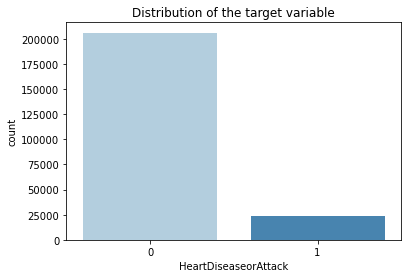

In [6]:
#%%
# Distribution of the target variable - HeartDiseaseorAttack
sns.countplot(x = df["HeartDiseaseorAttack"],
             palette = "Blues").set(title = "Distribution of the target variable")

# Distribution in terms of percentage of the target variable
print('The number of no heart disease or attack in the dataset are: ', round(df['HeartDiseaseorAttack'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('The number of heart disease or attack in the dataset are: ', round(df['HeartDiseaseorAttack'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

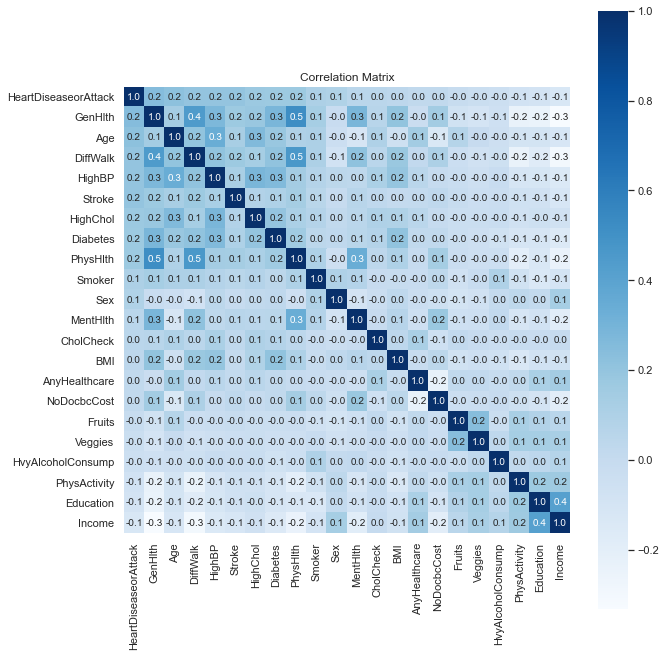

In [7]:
#%%
# Correlation plot for the dataset to see which variables are correlated to each other
correlation_matrix = df.corr()
k = 22 # number of variables for heatmap
cols = correlation_matrix.nlargest(k,'HeartDiseaseorAttack')['HeartDiseaseorAttack'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1)
fig, ax = plt.subplots(figsize = (10, 11))  # Sample figsize in inches
hm = sns.heatmap(cm, cbar=True, cmap = "Blues",
                 annot=True, square=True, 
                 fmt='.01f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values,ax=ax)
plt.title("Correlation Matrix")
plt.show()

In [8]:
#%%
# Checking for multicollinearity
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[["HighBP", "HighChol", "CholCheck", "BMI", "Smoker", "Stroke", "Diabetes", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk", "Sex", "Age", "Education", "Income"]]
y = df[["HeartDiseaseorAttack"]]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["variables"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

            variables        VIF
0              HighBP   2.376639
1            HighChol   2.075802
2           CholCheck  21.485319
3                 BMI  17.514900
4              Smoker   1.983754
5              Stroke   1.108968
6            Diabetes   1.419802
7        PhysActivity   4.144036
8              Fruits   2.828395
9             Veggies   5.287618
10  HvyAlcoholConsump   1.092803
11      AnyHealthcare  18.957120
12        NoDocbcCost   1.219131
13            GenHlth  10.995989
14           MentHlth   1.469514
15           PhysHlth   2.009715
16           DiffWalk   1.847508
17                Sex   1.888215
18                Age   9.680500
19          Education  27.129044
20             Income  12.612472


In [9]:
#%%
# Dropping columns with multicollinearity
df = df.drop(["CholCheck", "BMI", "AnyHealthcare",
             "GenHlth", "Age", "Education", "Income",
             "Veggies"], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229781 entries, 0 to 253679
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  229781 non-null  int32  
 1   HighBP                229781 non-null  float64
 2   HighChol              229781 non-null  float64
 3   Smoker                229781 non-null  float64
 4   Stroke                229781 non-null  float64
 5   Diabetes              229781 non-null  float64
 6   PhysActivity          229781 non-null  float64
 7   Fruits                229781 non-null  float64
 8   HvyAlcoholConsump     229781 non-null  float64
 9   NoDocbcCost           229781 non-null  float64
 10  MentHlth              229781 non-null  float64
 11  PhysHlth              229781 non-null  float64
 12  DiffWalk              229781 non-null  float64
 13  Sex                   229781 non-null  float64
dtypes: float64(13), int32(1)
memory usage: 33.5 MB


In [10]:
#%%
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

# Naive Bayes

In [11]:
#%%
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
Gnb = GaussianNB()
Gnb.fit(X_train, y_train)

gnb_ypred_train = Gnb.predict(X_train)
gnb_ypred_valid = Gnb.predict(X_valid)

print("Training Results:\n")
print(classification_report(y_train, gnb_ypred_train))

print("\n\n Validation Results:\n")
print(classification_report(y_valid, gnb_ypred_valid))

print("Naive Bayes Classifier Accuracy: ",accuracy_score(y_valid, gnb_ypred_valid))

Training Results:

              precision    recall  f1-score   support

           0       0.94      0.84      0.89    123614
           1       0.28      0.53      0.37     14254

    accuracy                           0.81    137868
   macro avg       0.61      0.69      0.63    137868
weighted avg       0.87      0.81      0.83    137868



 Validation Results:

              precision    recall  f1-score   support

           0       0.94      0.84      0.89     41181
           1       0.28      0.53      0.36      4775

    accuracy                           0.81     45956
   macro avg       0.61      0.69      0.62     45956
weighted avg       0.87      0.81      0.83     45956

Naive Bayes Classifier Accuracy:  0.8058577770040909


The AUC value is:  0.6859816483761955


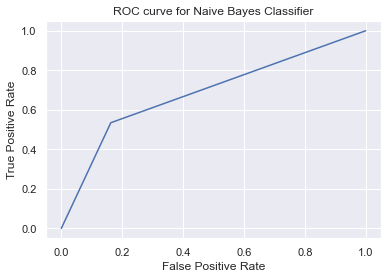

In [12]:
#%%
# ROC AUC curve
gnb_tpr, gnb_fpr, gnb_th = roc_curve(y_valid, Gnb.predict(X_valid))
plt.plot(gnb_tpr,gnb_fpr)
print("The AUC value is: ", roc_auc_score(y_valid, Gnb.predict(X_valid)))
plt.title("ROC curve for Naive Bayes Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [13]:
#%%
# Confusion Matrix
from sklearn.metrics import confusion_matrix 
print("Confusion Matrix for Naive Bayes Classifier", confusion_matrix(y_valid, gnb_ypred_valid))

Confusion Matrix for Naive Bayes Classifier [[34481  6700]
 [ 2222  2553]]


# Logistic Regression

In [14]:
#%%
# LogisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_ypred_train = lr.predict(X_train)
lr_ypred_valid = lr.predict(X_valid)

print("Training Results:\n")
print(classification_report(y_train, lr_ypred_train))

print("\n\n Validation Results:\n")
print(classification_report(y_valid, lr_ypred_valid))

print("Logistic Regression Accuracy is:", accuracy_score(y_valid, lr_ypred_valid))

Training Results:

              precision    recall  f1-score   support

           0       0.91      0.99      0.95    123614
           1       0.54      0.11      0.19     14254

    accuracy                           0.90    137868
   macro avg       0.72      0.55      0.57    137868
weighted avg       0.87      0.90      0.87    137868



 Validation Results:

              precision    recall  f1-score   support

           0       0.91      0.99      0.94     41181
           1       0.52      0.11      0.18      4775

    accuracy                           0.90     45956
   macro avg       0.71      0.55      0.56     45956
weighted avg       0.86      0.90      0.86     45956

Logistic Regression Accuracy is: 0.8967490643223953


The AUC value is:  0.5471123584034776


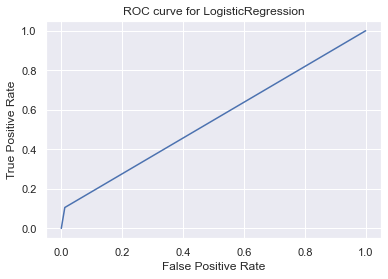

In [15]:
#%%
# ROC AUC curve 
lr_tpr, lr_fpr, lr_th = roc_curve(y_valid, lr.predict(X_valid))
plt.plot(lr_tpr,lr_fpr)
print("The AUC value is: ", roc_auc_score(y_valid, lr.predict(X_valid)))
plt.title("ROC curve for LogisticRegression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [16]:
#%%
# Confusion Matrix
print("Confusion Matrix for Logistic Regression", confusion_matrix(y_valid, lr_ypred_valid))

Confusion Matrix for Logistic Regression [[40706   475]
 [ 4270   505]]


# Decision Tree

In [17]:
#%%
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=3, random_state=1)
dtc.fit(X_train,y_train)

dtc_ypred_train = dtc.predict(X_train)
dtc_ypred_valid = dtc.predict(X_valid)

# Evaluate test-set accuracy
print("Training Results:\n")
print(classification_report(y_train, dtc_ypred_train))

print("\n\n Validation Results:\n")
print(classification_report(y_valid, dtc_ypred_valid))

print("Decision Tree Classifier Accuracy:", accuracy_score(y_valid, dtc_ypred_valid))

Training Results:

              precision    recall  f1-score   support

           0       0.90      0.99      0.95    123614
           1       0.53      0.08      0.14     14254

    accuracy                           0.90    137868
   macro avg       0.71      0.54      0.54    137868
weighted avg       0.86      0.90      0.86    137868



 Validation Results:

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     41181
           1       0.50      0.08      0.13      4775

    accuracy                           0.90     45956
   macro avg       0.70      0.53      0.54     45956
weighted avg       0.86      0.90      0.86     45956

Decision Tree Classifier Accuracy: 0.8962268256593263


The AUC value is:  0.5335833774814315


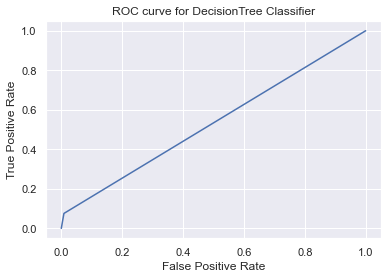

In [18]:
# %%
# ROC AUC curve
dtc_tpr, dtc_fpr, dtc_th = roc_curve(y_valid, dtc_ypred_valid)
plt.plot(dtc_tpr,dtc_fpr)
print("The AUC value is: ", roc_auc_score(y_valid, dtc_ypred_valid))
plt.title("ROC curve for DecisionTree Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [19]:
#%%
# Confusion Matrix
print("Confusion Matrix for Decision Tree Classifier", confusion_matrix(y_valid, dtc_ypred_valid))

Confusion Matrix for Decision Tree Classifier [[40825   356]
 [ 4413   362]]


# Random Forest

In [20]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#from sklearn.feature_selection import SelectFromModel

rs = RandomForestClassifier(random_state = 11, max_depth=16)
rs.fit(X_train, y_train)

rs_ypred_train = rs.predict(X_train)
rs_ypred_valid = rs.predict(X_valid)

print("Training Results:\n")
print(classification_report(y_train, rs_ypred_train))

print("\n\nTesting Results:\n")
print(classification_report(y_valid, rs_ypred_valid))

print("RandomForest Accuracy:", accuracy_score(y_valid, rs_ypred_valid))

Training Results:

              precision    recall  f1-score   support

           0       0.93      1.00      0.97    123614
           1       0.99      0.39      0.56     14254

    accuracy                           0.94    137868
   macro avg       0.96      0.70      0.77    137868
weighted avg       0.94      0.94      0.92    137868



Testing Results:

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     41181
           1       0.55      0.08      0.14      4775

    accuracy                           0.90     45956
   macro avg       0.73      0.54      0.54     45956
weighted avg       0.87      0.90      0.86     45956

RandomForest Accuracy: 0.8975977021498825


The AUC value is:  0.5371254089499669


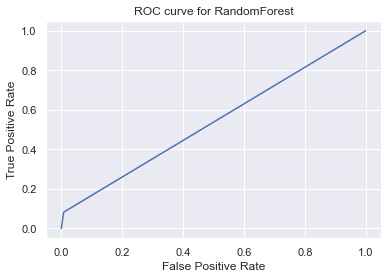

In [21]:
#%%
# ROC AUC curve
rs_tpr, rs_fpr, rs_th = roc_curve(y_valid, rs_ypred_valid)
plt.plot(rs_tpr,rs_fpr)
print("The AUC value is: ", roc_auc_score(y_valid, rs_ypred_valid))
plt.title("ROC curve for RandomForest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [22]:
#%%
# Confusion Matrix
print("Confusion Matrix for Random Forest", confusion_matrix(y_valid, rs_ypred_valid))

Confusion Matrix for Random Forest [[40858   323]
 [ 4383   392]]


<BarContainer object of 14 artists>

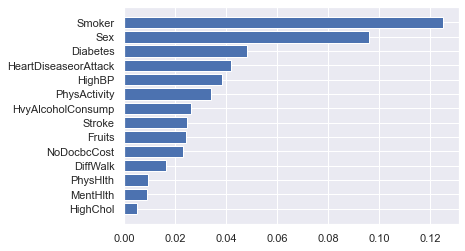

In [23]:
f_i = list(zip(df,rs.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

# XGBoost

In [24]:
#%%
#XGBoost Classifier
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

xgbc_ypred_train = xgbc.predict(X_train)
xgbc_ypred_valid = xgbc.predict(X_valid)

# Evaluate test-set accuracy
print("Training Results:\n")
print(classification_report(y_train, xgbc_ypred_train))

print("\n\n Validation Results:\n")
print(classification_report(y_valid, xgbc_ypred_valid))

print("XGBoost Accuracy:", accuracy_score(y_valid, xgbc_ypred_valid))

Training Results:

              precision    recall  f1-score   support

           0       0.91      0.99      0.95    123614
           1       0.73      0.18      0.29     14254

    accuracy                           0.91    137868
   macro avg       0.82      0.59      0.62    137868
weighted avg       0.89      0.91      0.88    137868



 Validation Results:

              precision    recall  f1-score   support

           0       0.91      0.99      0.94     41181
           1       0.50      0.12      0.19      4775

    accuracy                           0.90     45956
   macro avg       0.70      0.55      0.57     45956
weighted avg       0.86      0.90      0.87     45956

XGBoost Accuracy: 0.8962268256593263


The AUC value is:  0.5531157572667007


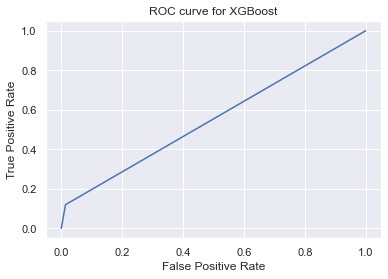

In [25]:
#%%
xgbc_tpr, xgbc_fpr, xgbc_th = roc_curve(y_valid, xgbc_ypred_valid)
plt.plot(xgbc_tpr, xgbc_fpr)
print("The AUC value is: ", roc_auc_score(y_valid, xgbc_ypred_valid))
plt.title("ROC curve for XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [26]:
#%%
# Confusion Matrix
print("Confusion Matrix for XGBoost", confusion_matrix(y_valid, xgbc_ypred_valid))

Confusion Matrix for XGBoost [[40614   567]
 [ 4202   573]]


# Testing dataset



 Testing Results:

              precision    recall  f1-score   support

           0       0.94      0.85      0.89     41269
           1       0.29      0.55      0.38      4688

    accuracy                           0.82     45957
   macro avg       0.61      0.70      0.63     45957
weighted avg       0.88      0.82      0.84     45957

Naive Bayes Classifier Accuracy:  0.8155449659464282
The AUC value is:  0.6957372390766416


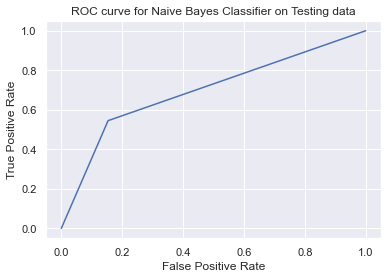

Confusion Matrix for Naive Bayes Classifier [[34924  6345]
 [ 2132  2556]]


In [27]:
# Naive Bayes
gnb_ypred_test = Gnb.predict(X_test)

print("\n\n Testing Results:\n")
print(classification_report(y_test, gnb_ypred_test))

print("Naive Bayes Classifier Accuracy: ",accuracy_score(y_test, gnb_ypred_test))

#%%
# ROC AUC curve
gnb_tpr, gnb_fpr, gnb_th = roc_curve(y_test, Gnb.predict(X_test))
plt.plot(gnb_tpr,gnb_fpr)
print("The AUC value is: ", roc_auc_score(y_test, Gnb.predict(X_test)))
plt.title("ROC curve for Naive Bayes Classifier on Testing data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#%%
# Confusion Matrix
from sklearn.metrics import confusion_matrix 
print("Confusion Matrix for Naive Bayes Classifier", confusion_matrix(y_test, gnb_ypred_test))



 Testing Results:

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     41269
           1       0.55      0.11      0.19      4688

    accuracy                           0.90     45957
   macro avg       0.73      0.55      0.57     45957
weighted avg       0.87      0.90      0.87     45957

Logistic Regression Accuracy is: 0.8999499532171378
The AUC value is:  0.5512909655141158


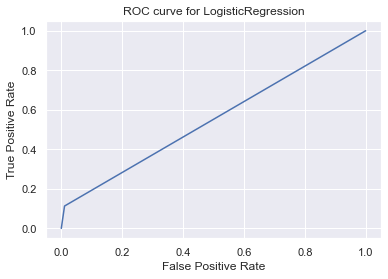

Confusion Matrix for Logistic Regression [[40828   441]
 [ 4157   531]]


In [28]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_ypred_test = lr.predict(X_test)

print("\n\n Testing Results:\n")
print(classification_report(y_test, lr_ypred_test))

print("Logistic Regression Accuracy is:", accuracy_score(y_test, lr_ypred_test))

#%%
# ROC AUC curve 
lr_tpr, lr_fpr, lr_th = roc_curve(y_test, lr.predict(X_test))
plt.plot(lr_tpr,lr_fpr)
print("The AUC value is: ", roc_auc_score(y_test, lr.predict(X_test)))
plt.title("ROC curve for LogisticRegression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#%%
# Confusion Matrix
print("Confusion Matrix for Logistic Regression", confusion_matrix(y_test, lr_ypred_test))

Training Results:

              precision    recall  f1-score   support

           0       0.90      0.99      0.95    123614
           1       0.53      0.08      0.14     14254

    accuracy                           0.90    137868
   macro avg       0.71      0.54      0.54    137868
weighted avg       0.86      0.90      0.86    137868



Testing Results:

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     41269
           1       0.55      0.08      0.13      4688

    accuracy                           0.90     45957
   macro avg       0.73      0.53      0.54     45957
weighted avg       0.87      0.90      0.86     45957

Decision Tree Classifier Accuracy on Testing data is: 0.8994494853885153
The AUC value is:  0.5348460243816128


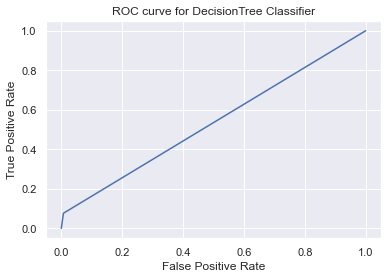

Confusion Matrix for Decision Tree Classifier [[40976   293]
 [ 4328   360]]


In [29]:
#%%
# Decision Tree Classifier

dtc_ypred_test = dtc.predict(X_test)

# Evaluate test-set accuracy
print("Training Results:\n")
print(classification_report(y_train, dtc_ypred_train))

print("\n\nTesting Results:\n")
print(classification_report(y_test, dtc_ypred_test))

print("Decision Tree Classifier Accuracy on Testing data is:", accuracy_score(y_test, dtc_ypred_test))

# %%
# ROC AUC curve
dtc_tpr, dtc_fpr, dtc_th = roc_curve(y_test, dtc_ypred_test)
plt.plot(dtc_tpr,dtc_fpr)
print("The AUC value is: ", roc_auc_score(y_test, dtc_ypred_test))
plt.title("ROC curve for DecisionTree Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#%%
# Confusion Matrix
print("Confusion Matrix for Decision Tree Classifier", confusion_matrix(y_test, dtc_ypred_test))

Training Results:

              precision    recall  f1-score   support

           0       0.93      1.00      0.97    123614
           1       0.99      0.39      0.56     14254

    accuracy                           0.94    137868
   macro avg       0.96      0.70      0.77    137868
weighted avg       0.94      0.94      0.92    137868



Testing Results:

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     41269
           1       0.58      0.08      0.15      4688

    accuracy                           0.90     45957
   macro avg       0.74      0.54      0.55     45957
weighted avg       0.87      0.90      0.87     45957

RandomForest Accuracy on Testing data: 0.9002328263376634
The AUC value is:  0.5383074561912408


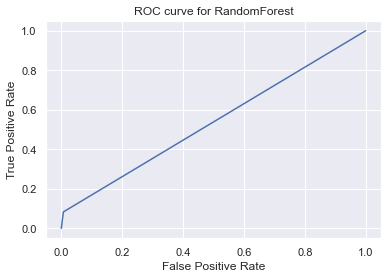

Confusion Matrix for Random Forest [[40980   289]
 [ 4296   392]]


In [30]:
# Random Forest

rs_ypred_test = rs.predict(X_test)

print("Training Results:\n")
print(classification_report(y_train, rs_ypred_train))

print("\n\nTesting Results:\n")
print(classification_report(y_test, rs_ypred_test))

print("RandomForest Accuracy on Testing data:", accuracy_score(y_test, rs_ypred_test))

#%%
# ROC AUC curve
rs_tpr, rs_fpr, rs_th = roc_curve(y_test, rs_ypred_test)
plt.plot(rs_tpr,rs_fpr)
print("The AUC value is: ", roc_auc_score(y_test, rs_ypred_test))
plt.title("ROC curve for RandomForest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#%%
# Confusion Matrix
print("Confusion Matrix for Random Forest", confusion_matrix(y_test, rs_ypred_test))

Training Results:

              precision    recall  f1-score   support

           0       0.91      0.99      0.95    123614
           1       0.73      0.18      0.29     14254

    accuracy                           0.91    137868
   macro avg       0.82      0.59      0.62    137868
weighted avg       0.89      0.91      0.88    137868



Testing Results:

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     41269
           1       0.53      0.12      0.20      4688

    accuracy                           0.90     45957
   macro avg       0.72      0.56      0.57     45957
weighted avg       0.87      0.90      0.87     45957

XGBoost Accuracy on Testing data: 0.8994930043301347
The AUC value is:  0.5559525994935253


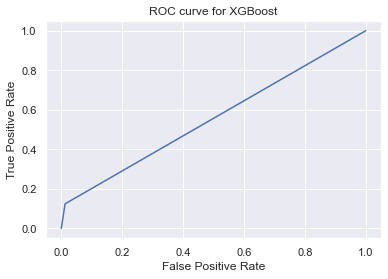

Confusion Matrix for XGBoost [[40755   514]
 [ 4105   583]]


In [31]:
#%%
#XGBoost Classifier

xgbc_ypred_test = xgbc.predict(X_test)

# Evaluate test-set accuracy
print("Training Results:\n")
print(classification_report(y_train, xgbc_ypred_train))

print("\n\nTesting Results:\n")
print(classification_report(y_test, xgbc_ypred_test))

print("XGBoost Accuracy on Testing data:", accuracy_score(y_test, xgbc_ypred_test))

#%%
xgbc_tpr, xgbc_fpr, xgbc_th = roc_curve(y_test, xgbc_ypred_test)
plt.plot(xgbc_tpr, xgbc_fpr)
print("The AUC value is: ", roc_auc_score(y_test, xgbc_ypred_test))
plt.title("ROC curve for XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#%%
# Confusion Matrix
print("Confusion Matrix for XGBoost", confusion_matrix(y_test, xgbc_ypred_test))